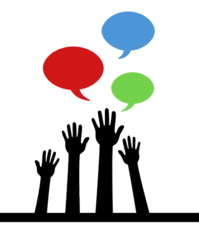

# The Sparks Foundation

## Graduate Rotational Internship Program (GRIP) April2021 Batch

## Data Science & Business Analytics 

# By : Anshul Gupta

## Task - 6 : Create the Decision Tree classifier and visualize it graphically.

#### Importing Necessary Libraries

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [28]:
%matplotlib inline

### Loading Dataset

In [4]:
data = pd.read_csv("Iris.csv")

In [5]:
data.drop('Id',axis=1,inplace=True)

In [6]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Shape of dataset
data.shape

(150, 5)

In [8]:
# Statistics fact about data
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Checking for Null Value

In [9]:
data.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

### Plotting a pie chart to represent Distribution of flower species

<IPython.core.display.Javascript object>


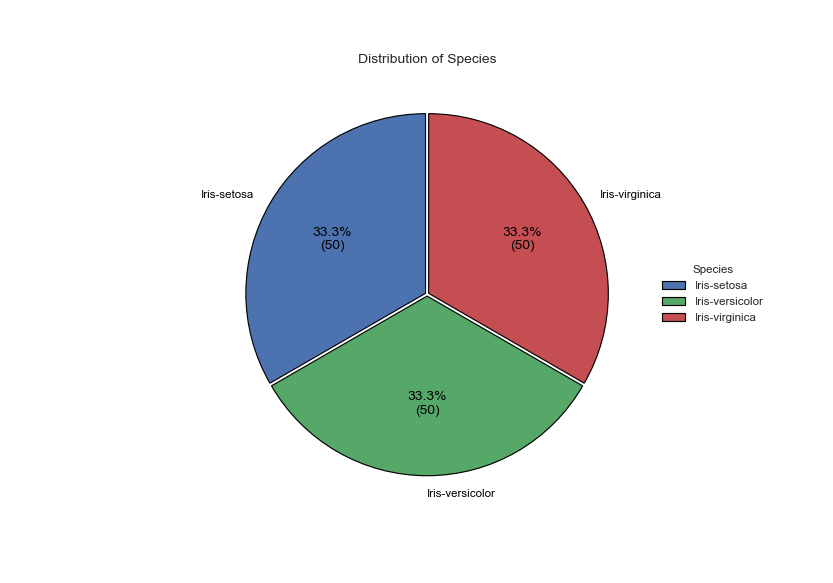

In [10]:
label = data['Species'].unique()
  
dat = data['Species'].value_counts()
  
# Creating explode data
explode = (0.01, 0.01, 0.01)

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(dat, 
                                  autopct = lambda pct: func(pct, dat),
                                  explode = explode, 
                                  labels = label,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
  
# Adding legend
ax.legend(wedges, label,
          title ="Species",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 12)
ax.set_title("Distribution of Species")
  
# show plot
plt.show()

### Boxplot between various features & detecting outliers

<IPython.core.display.Javascript object>


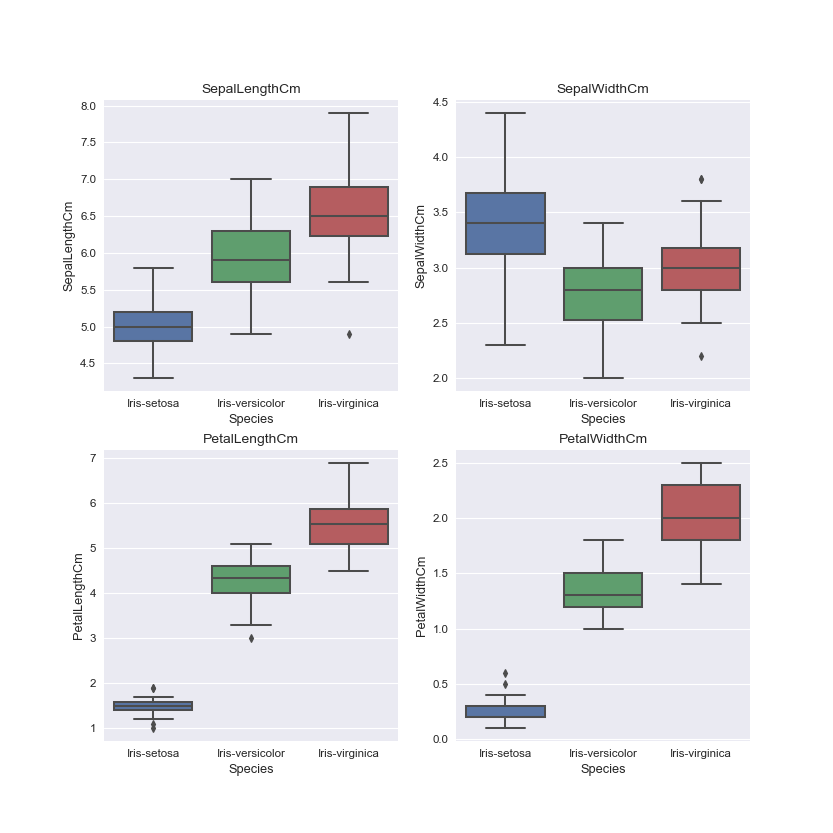

In [11]:
f = 1
plt.figure(figsize = (10,10))
for i in data.columns[:-1]:
    
    plt.subplot(2,2,f)
    
    sns.boxplot(x='Species',y=i,data=data)
    
    plt.title(i)
    
    f=f+1
    
plt.show()

### Pairplot - Pairwise Relationships b/w Features

<Figure size 432x432 with 0 Axes>

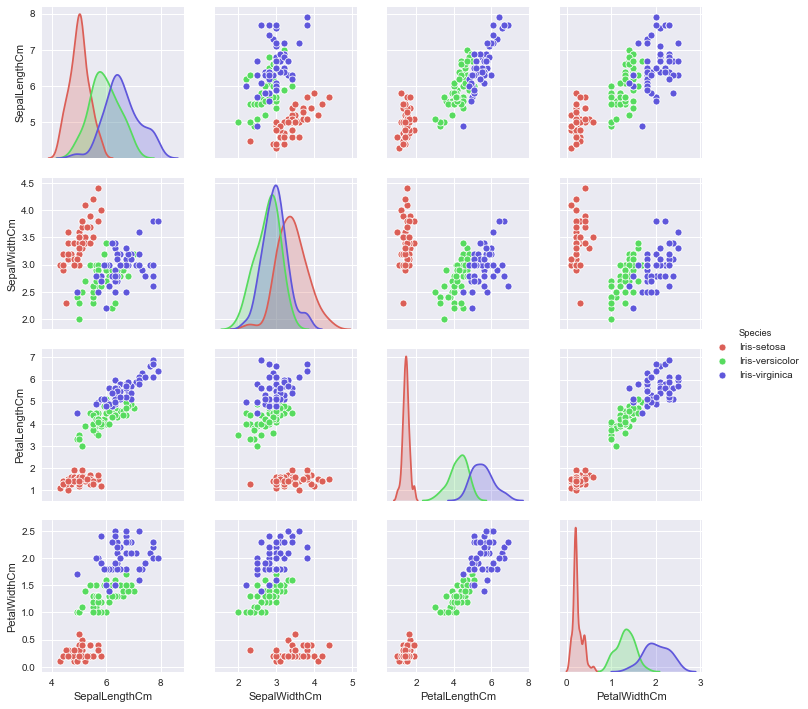

In [29]:
plt.figure(figsize=(6,6))
sns.pairplot(data,hue="Species",palette="hls")
plt.show()

## Modeling Decision Tree Classifier

In [13]:
# Dividing dataframe into X(features) & Y(label)

X = data.iloc[:,[0,1,2,3]].values

Y = data.iloc[:,-1].values.reshape(-1)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state = 3)

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.95


#### Accuracy of Decision Tree classifier on training set comes out to be perfect 1 which indicates that the classfier is likely overfitting the training data

## Model Tuning

In [15]:
# Tuning model using max_depth Parameter which sets the maximum depth of decision tree

clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


# Plotting Decision Tree

In [16]:
feature_name = list(data.columns[:-1])

classnames = ['Iris-setosa','Iris-versicolor','Iris-virginica']

In [17]:
import graphviz
from sklearn.tree import export_graphviz

def plot_decision_tree(clf, feature_names, class_names):
    
    export_graphviz(clf, out_file="adspy_temp.dot", feature_names=feature_name, class_names=classnames, filled = True, impurity = False)
    with open("adspy_temp.dot") as f:
        dot_graph = f.read()
    # Alternate method using pydotplus, if installed.
    # graph = pydotplus.graphviz.graph_from_dot_data(dot_graph)
    # return graph.create_png()
    return graphviz.Source(dot_graph)

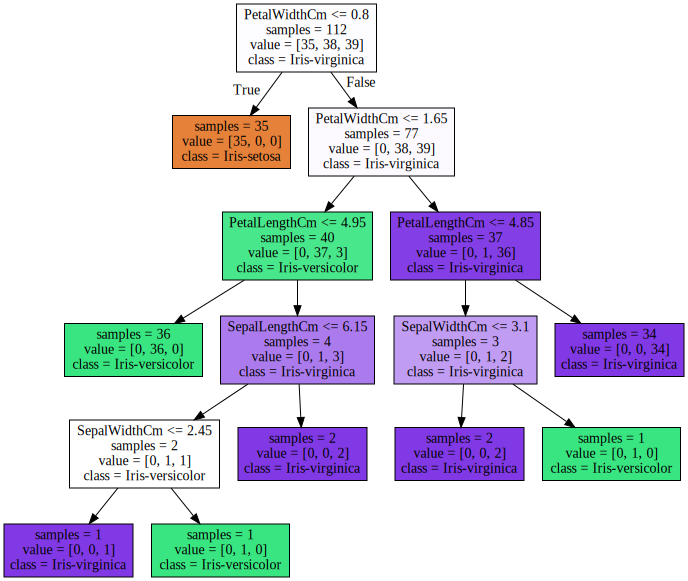

In [18]:
plot_decision_tree(clf, feature_name, classnames)

## Pre-Pruned (max_depth = 3)

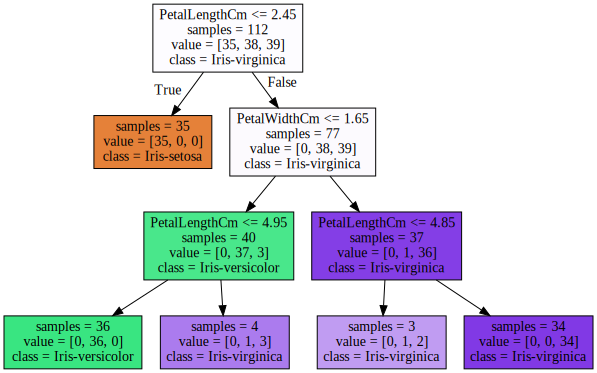

In [19]:
plot_decision_tree(clf2, feature_name, classnames)

### Visualizing Feature Importance

In [20]:
def plot_feature_importances(clf, feature_name):
    c_features = len(feature_name)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_name)

<IPython.core.display.Javascript object>


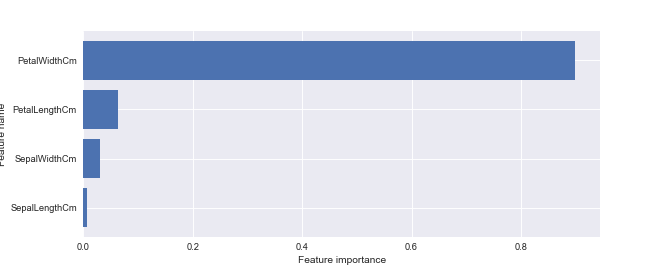

Feature importances: [0.00670338 0.03128242 0.06251049 0.89950372]


In [21]:
import matplotlib.pyplot as plt
#from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, feature_name)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))